X = T + S + R or X = T * S * R

Trend:
linear regression

Seasonality:
Check de periodicity of the data

Residuals: 
- centered moving averages
- weight moving averages
- ARIMA model

## TIMES SERIES

The dataset provides information regarding the Covid crisis. It has information such as the number of cases, deaths according to the dates and locations. The time serie goes from 2020-01-01 to 2022-12-09.  
The analysis will be made on the number of cases daily in order to forecast a week ahead.

## STEP 1 : import the data and prepare it

In [1]:
# import libraries
import matplotlib.pyplot as plt

# load data.csv 
import pandas as pd
df = pd.read_csv('data.csv', index_col=0, parse_dates=True)

d:\Logiciels\Anaconda2\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
d:\Logiciels\Anaconda2\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
d:\Logiciels\Anaconda2\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '29/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
d:\Logiciels\Anaconda2\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
d:\Logiciels\Anaconda2\lib\site-pack

In [2]:
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
dateRep,,,,,,,,,,
2022-12-09,12,9,2022,4915.0,1.0,Austria,AT,AUT,8901064,Europe
2022-11-09,11,9,2022,2730.0,1.0,Austria,AT,AUT,8901064,Europe
2022-10-09,10,9,2022,3399.0,3.0,Austria,AT,AUT,8901064,Europe
2022-09-09,9,9,2022,4139.0,2.0,Austria,AT,AUT,8901064,Europe
2022-08-09,8,9,2022,4278.0,2.0,Austria,AT,AUT,8901064,Europe
...,...,...,...,...,...,...,...,...,...,...
2020-08-02,8,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
2020-07-02,7,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
2020-06-02,6,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe


In [3]:
# select only France 

df_fr = df[df.countriesAndTerritories == 'France']

In [4]:
# put dateRed as a column

df_fr = df_fr.reset_index()

In [5]:
# delete the rows with negative values
df_fr = df_fr[df_fr.cases >= 0]

# sort the date 
df_fr = df_fr.sort_values(by='dateRep')

In [6]:
df_fr

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
955,2020-01-02,1,2,2020,0.0,0.0,France,FR,FRA,67320216,Europe
926,2020-01-03,1,3,2020,45.0,0.0,France,FR,FRA,67320216,Europe
895,2020-01-04,1,4,2020,4861.0,509.0,France,FR,FRA,67320216,Europe
865,2020-01-05,1,5,2020,604.0,212.0,France,FR,FRA,67320216,Europe
834,2020-01-06,1,6,2020,338.0,31.0,France,FR,FRA,67320216,Europe
...,...,...,...,...,...,...,...,...,...,...,...
124,2022-12-05,12,5,2022,36047.0,84.0,France,FR,FRA,67320216,Europe
93,2022-12-06,12,6,2022,79397.0,5.0,France,FR,FRA,67320216,Europe
63,2022-12-07,12,7,2022,182006.0,126.0,France,FR,FRA,67320216,Europe
32,2022-12-08,12,8,2022,22638.0,74.0,France,FR,FRA,67320216,Europe


The time serie goes from 2020-01-01 to 2022-12-09

In [7]:
print("",df_fr.dateRep.min(),df_fr.dateRep.max())

 2020-01-02 00:00:00 2022-12-09 00:00:00


## STEP 2 : plot the data

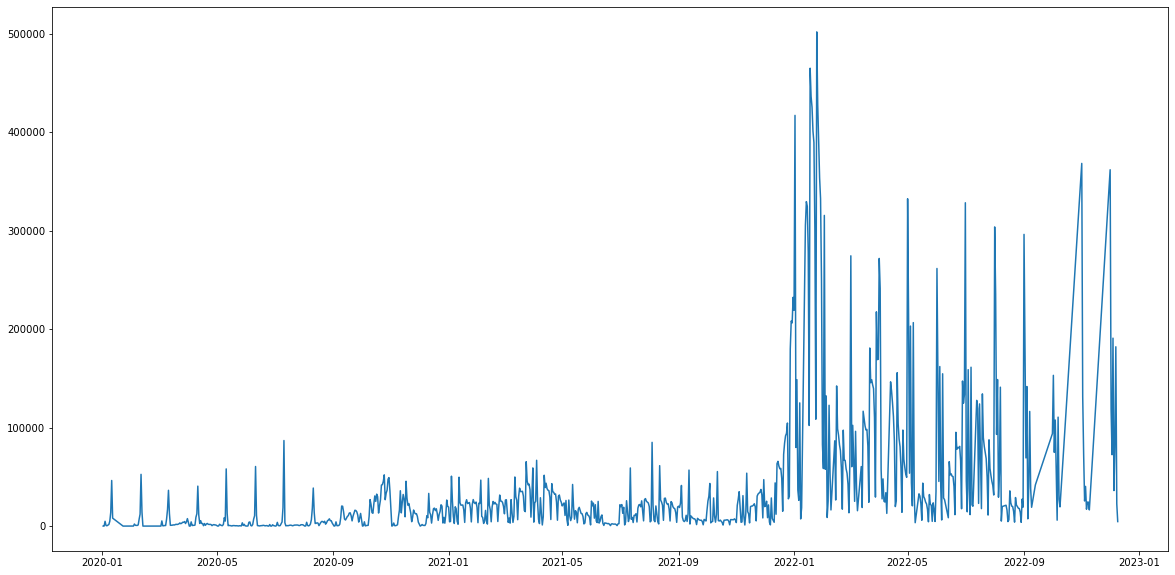

In [8]:
# plot  line the df_fr_cases
plt.figure(figsize=(20,10))


plt.plot(df_fr.dateRep, df_fr.cases)
plt.show()

In [9]:
# resampling to have daily data 
df_fr_daily = df_fr.resample('D', on='dateRep').sum()

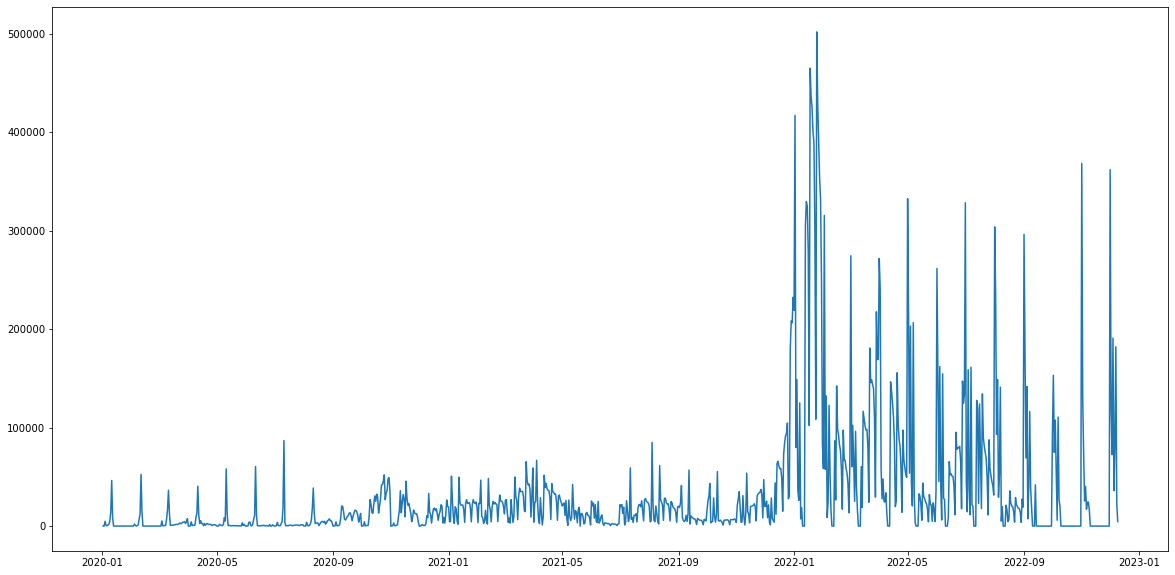

In [10]:
# plot  line the df_fr_cases_daily in a larger windows 
plt.figure(figsize=(20,10))


plt.plot(df_fr_daily.index, df_fr_daily.cases)
plt.show()

In [11]:
# resampling to have weekly data 
df_fr_weekly = df_fr.resample('W', on='dateRep').sum()


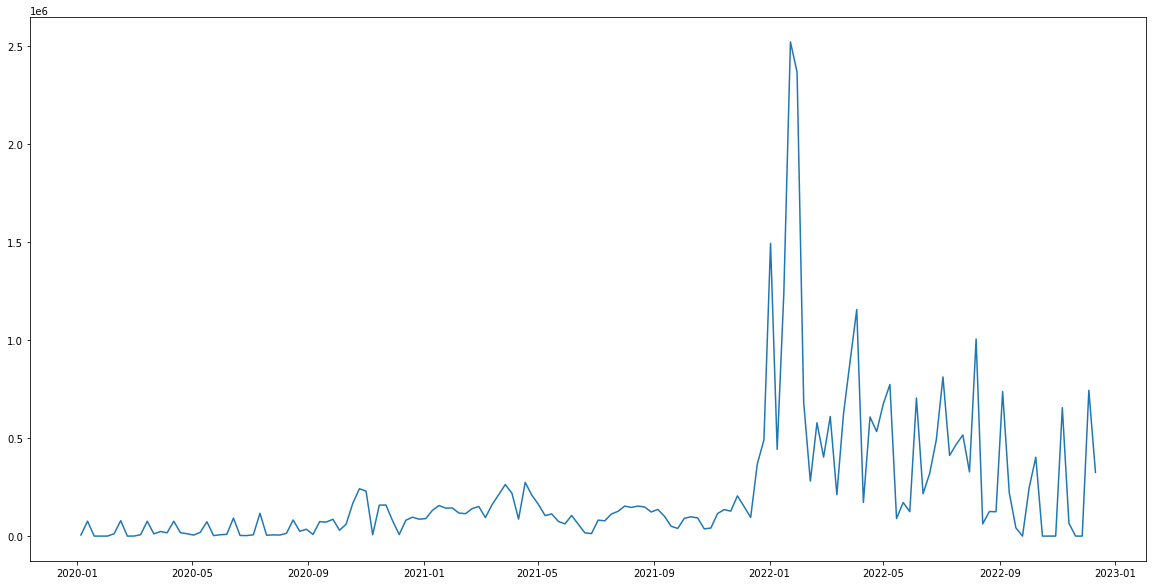

In [12]:
# plot  line the df_fr_cases_weekly in a larger windows 

plt.figure(figsize=(20,10))


plt.plot(df_fr_weekly.index, df_fr_weekly.cases)
plt.show()


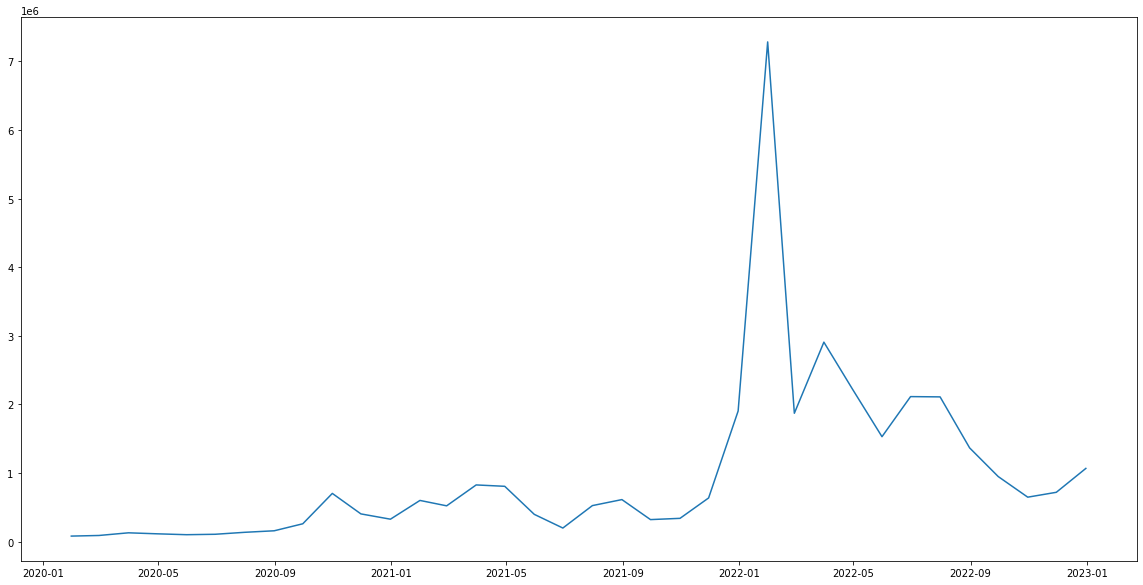

In [13]:
# resampling to have monthly data and plot 
plt.figure(figsize=(20,10))

df_fr_monthly = df_fr.resample('M', on='dateRep').sum()

plt.plot(df_fr_monthly.index, df_fr_monthly.cases)
plt.show()

## STEP 3 : look at the trend

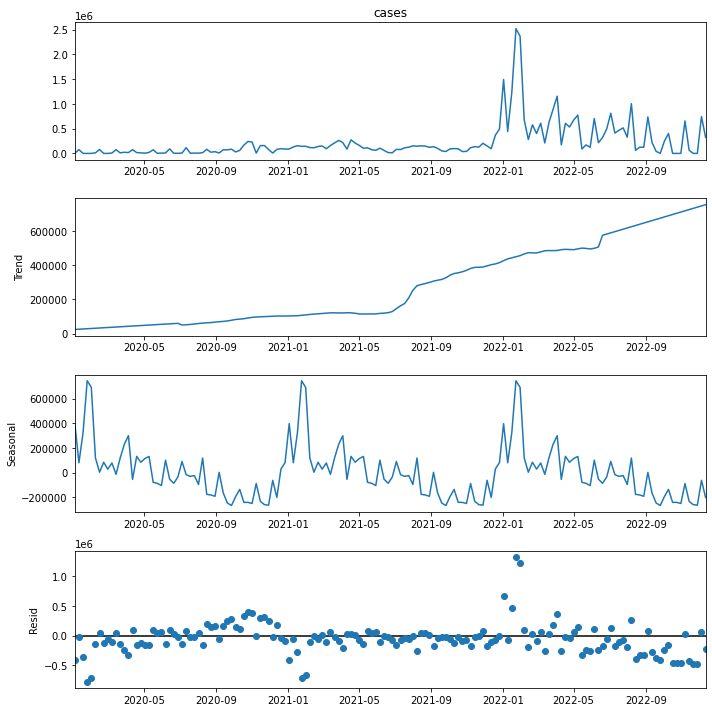

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(df_fr_weekly['cases'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot()
plt.show()

# ___________________________ BROUILLON ____________________________

In [15]:
# create dataframe with the dateRep and the cases
df = df_fr[['dateRep','cases']]
df

,dateRep,cases
955,2020-01-02,0.0
926,2020-01-03,45.0
895,2020-01-04,4861.0
865,2020-01-05,604.0
834,2020-01-06,338.0
...,...,...
124,2022-12-05,36047.0
93,2022-12-06,79397.0
63,2022-12-07,182006.0
32,2022-12-08,22638.0


In [16]:
train=df.iloc[0:962]
train

,dateRep,cases
955,2020-01-02,0.0
926,2020-01-03,45.0
895,2020-01-04,4861.0
865,2020-01-05,604.0
834,2020-01-06,338.0
...,...,...
124,2022-12-05,36047.0
93,2022-12-06,79397.0
63,2022-12-07,182006.0
32,2022-12-08,22638.0


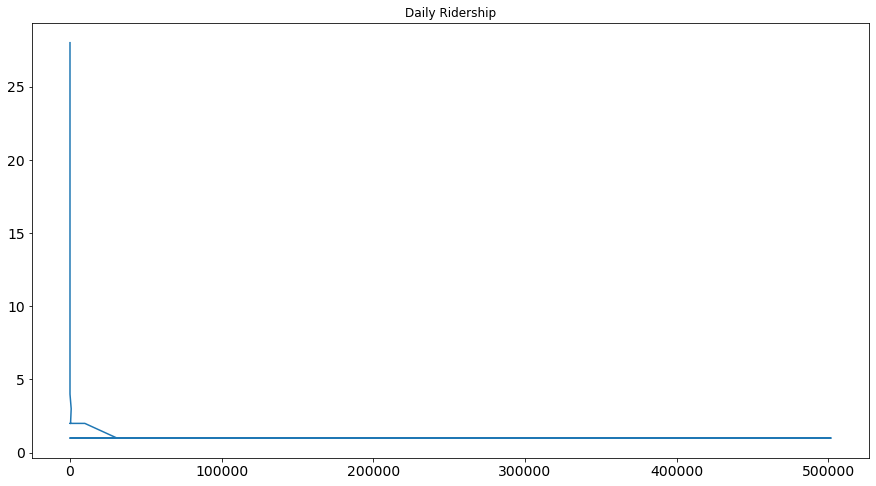

In [17]:
#Index 11856 marks the end of year 2013
# df = pd.read_csv('dataset.csv', nrows = 11856)
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df.iloc[0:962]
test=df.iloc[962:]
#Aggregating the dataset at daily level
# df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
# df.index = df.Timestamp 
# df = df.resample('D').mean()
# train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.dateRep 
# train = train.resample('D').mean() 
# test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.dateRep 
# test = test.resample('D').mean()
# Plotting data
train.cases.value_counts().plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.cases.value_counts().plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [18]:
from statsmodels.tsa.api import Holt

fit1 = Holt(df_fr_weekly).fit(smoothing_level = 0.1,smoothing_slope = 0.3, optimized=False)
fit1.fittedvalues

ValueError: endog is required to have ndim 1 but has ndim 2

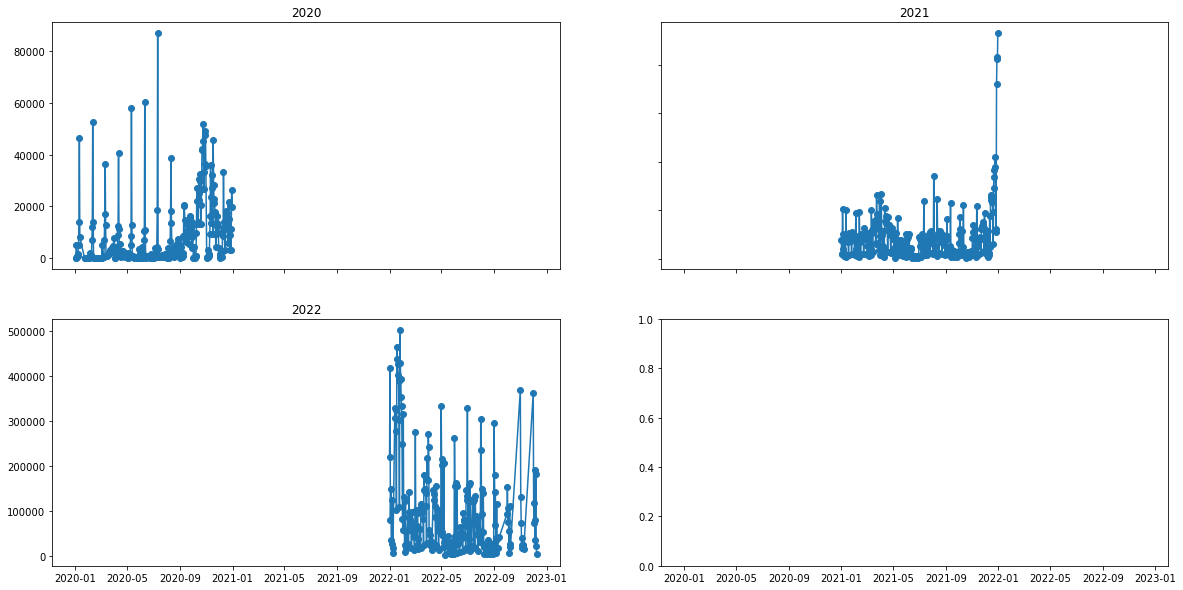

In [ ]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

# Xt = Rt

### Moving average and exponential moving average

In [ ]:
# moving average

df_fr_cases['moving_average'] = df_fr_cases.cases.rolling(window=7).mean()

# exponential moving average

df_fr_cases['exp_moving_average'] = df_fr_cases.cases.ewm(span=7).mean()

C:\Users\Manon Lemaire\AppData\Local\Temp\ipykernel_14852\3676609016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr_cases['moving_average'] = df_fr_cases.cases.rolling(window=7).mean()
C:\Users\Manon Lemaire\AppData\Local\Temp\ipykernel_14852\3676609016.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr_cases['exp_moving_average'] = df_fr_cases.cases.ewm(span=7).mean()


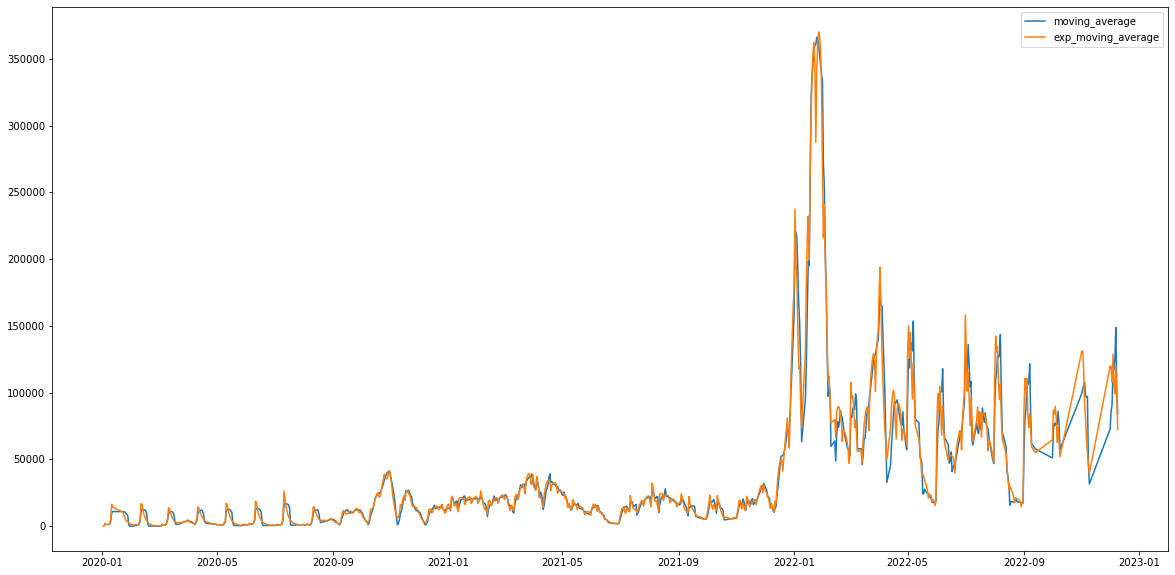

In [ ]:
# plot the moving averages and the exp_moving_average

plt.figure(figsize=(20,10))

plt.plot(df_fr_cases.dateRep, df_fr_cases.moving_average, label='moving_average')

plt.plot(df_fr_cases.dateRep, df_fr_cases.exp_moving_average, label='exp_moving_average')

plt.legend()    

plt.show()

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing*

In [ ]:
# seasonal decomposition 

# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


from statsmodels.tsa.seasonal import seasonal_decompose

# converting timestamp to float

df_fr_cases['dateRep'] = df_fr_cases['dateRep'].float()


seasonal_decompose(df_fr_cases, model='additive').plot()

AttributeError: 'Series' object has no attribute 'float'

C:\Users\Manon Lemaire\AppData\Local\Temp\ipykernel_11528\3237849482.py:11: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['dateRep'], dtype='object')
  rolling_mean = df_fr_cases.rolling(window = 12).mean()
C:\Users\Manon Lemaire\AppData\Local\Temp\ipykernel_11528\3237849482.py:12: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['dateRep'], dtype='object')
  rolling_std = df_fr_cases.rolling(window = 12).std()


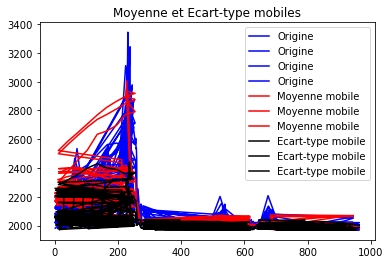

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


rolling_mean = df_fr_cases.rolling(window = 12).mean()
rolling_std = df_fr_cases.rolling(window = 12).std()
plt.plot(df_fr_cases, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()